In [1]:
import re
import pandas as pd
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
y_2015 = pd.read_csv('../data/2015.csv')
y_2016 = pd.read_csv('../data/2016.csv')
y_2017 = pd.read_csv('../data/2017.csv')
y_2018 = pd.read_csv('../data/2018.csv')
y_2019 = pd.read_csv('../data/2019.csv')

In [3]:
# --- 2015 ---
rename_2015 = {
    "Happiness Score": "Happiness_Score",
    "Happiness Rank": "Happiness_Rank",
    "Economy (GDP per Capita)": "GDP_per_Capita",
    "Health (Life Expectancy)": "Healthy_Life_Expectancy",
    "Trust (Government Corruption)": "Perceptions_of_Corruption",
    "Family": "Social_Support",
}
y_2015 = y_2015.rename(columns=rename_2015)
y_2015["Year"] = 2015


# --- 2016 ---
rename_2016 = {
    "Happiness Score": "Happiness_Score",
    "Happiness Rank": "Happiness_Rank",
    "Economy (GDP per Capita)": "GDP_per_Capita",
    "Health (Life Expectancy)": "Healthy_Life_Expectancy",
    "Trust (Government Corruption)": "Perceptions_of_Corruption",
    "Family": "Social_Support",
}
y_2016 = y_2016.rename(columns=rename_2016)
y_2016["Year"] = 2016


# --- 2017 ---
rename_2017 = {
    "Happiness.Rank": "Happiness_Rank",
    "Happiness.Score": "Happiness_Score",
    "Economy..GDP.per.Capita.": "GDP_per_Capita",
    "Health..Life.Expectancy.": "Healthy_Life_Expectancy",
    "Trust..Government.Corruption.": "Perceptions_of_Corruption",
    "Family": "Social_Support",
    "Whisker.high": "Upper_Confidence_Interval",
    "Whisker.low": "Lower_Confidence_Interval",
    "Dystopia.Residual": "Dystopia_Residual",
}
y_2017 = y_2017.rename(columns=rename_2017)
y_2017["Year"] = 2017
y_2017["Region"] = pd.NA  # no existe en 2017


# --- 2018 ---
rename_2018 = {
    "Overall rank": "Happiness_Rank",
    "Country or region": "Country",
    "Score": "Happiness_Score",
    "GDP per capita": "GDP_per_Capita",
    "Social support": "Social_Support",
    "Healthy life expectancy": "Healthy_Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Generosity": "Generosity",
    "Perceptions of corruption": "Perceptions_of_Corruption",
}
y_2018 = y_2018.rename(columns=rename_2018)
y_2018["Year"] = 2018
y_2018["Region"] = pd.NA  # no existe en 2018


# --- 2019 ---
rename_2019 = {
    "Overall rank": "Happiness_Rank",
    "Country or region": "Country",
    "Score": "Happiness_Score",
    "GDP per capita": "GDP_per_Capita",
    "Social support": "Social_Support",
    "Healthy life expectancy": "Healthy_Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Generosity": "Generosity",
    "Perceptions of corruption": "Perceptions_of_Corruption",
}
y_2019 = y_2019.rename(columns=rename_2019)
y_2019["Year"] = 2019
y_2019["Region"] = pd.NA  # no existe en 2019


In [4]:
print(y_2015.isnull().sum())
print(y_2016.isnull().sum())
print(y_2017.isnull().sum())
print(y_2018.isnull().sum())
print(y_2019.isnull().sum())


Country                      0
Region                       0
Happiness_Rank               0
Happiness_Score              0
Standard Error               0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Perceptions_of_Corruption    0
Generosity                   0
Dystopia Residual            0
Year                         0
dtype: int64
Country                      0
Region                       0
Happiness_Rank               0
Happiness_Score              0
Lower Confidence Interval    0
Upper Confidence Interval    0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Perceptions_of_Corruption    0
Generosity                   0
Dystopia Residual            0
Year                         0
dtype: int64
Country                        0
Happiness_Rank                 0
Happiness_Score                0
Upper_Confidence_Interval      0
Lower

solo un nulo en 2018 en perception of corruption

In [5]:
# Ver las filas donde la columna es nula
y_2018[y_2018["Perceptions_of_Corruption"].isna()][
    ["Year", "Country", "Region", "Perceptions_of_Corruption"]
]


,Year,Country,Region,Perceptions_of_Corruption
19,2018,United Arab Emirates,<NA>,NaN


In [6]:
print("info 2015-2019")
print(y_2015.info())
print(y_2016.info())
print(y_2017.info())   
print(y_2018.info())
print(y_2019.info())

info 2015-2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    158 non-null    object 
 1   Region                     158 non-null    object 
 2   Happiness_Rank             158 non-null    int64  
 3   Happiness_Score            158 non-null    float64
 4   Standard Error             158 non-null    float64
 5   GDP_per_Capita             158 non-null    float64
 6   Social_Support             158 non-null    float64
 7   Healthy_Life_Expectancy    158 non-null    float64
 8   Freedom                    158 non-null    float64
 9   Perceptions_of_Corruption  158 non-null    float64
 10  Generosity                 158 non-null    float64
 11  Dystopia Residual          158 non-null    float64
 12  Year                       158 non-null    int64  
dtypes: float64(9), int64(2), object(2)


In [7]:
#pip install country_converter


In [8]:

cc = coco.CountryConverter()

# --- Normalizaciones de nombres para que coco los reconozca ---
FIX_NAMES = {
    "Hong Kong S.A.R., China": "Hong Kong",
    "Taiwan Province of China": "Taiwan",
    "Trinidad and Tobago": "Trinidad & Tobago",
    "Congo (Brazzaville)": "Republic of the Congo",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",
    "Ivory Coast": "Côte d'Ivoire",
    "Macedonia": "North Macedonia",
    "Swaziland": "Eswatini",
    "North Cyprus": "Cyprus",
    "Northern Cyprus": "Cyprus",
    "Palestinian Territories": "State of Palestine",
    "Kyrgyzstan": "Kyrgyz Republic",
    "Laos": "Lao People's Democratic Republic",
    "Russia": "Russian Federation",
    "South Korea": "Korea, Republic of",
}

def add_region(df, country_col="Country", region_col="Region", to="UNregion"):
    """
    Asigna la región ONU a cada país del df[country_col] y crea df[region_col].
    'to' puede ser UNregion' (continente).
    """
    # 1) limpiar strings
    df[country_col] = df[country_col].astype(str).str.strip()

    # 2) normalizar nombres difíciles
    df[country_col] = df[country_col].replace(FIX_NAMES)

    # 3) convertir con coco
    conv = cc.convert(names=df[country_col].tolist(), to=to, not_found=None)
    df[region_col] = pd.Series(conv, index=df.index)

    return df

# === Aplica a tus dataframes de cada año ===
# y_2017, y_2018, y_2019 ya deberían tener la columna Country (renombrada antes en tu ETL)
y_2017 = add_region(y_2017, country_col="Country", region_col="Region", to="UNregion")
y_2018 = add_region(y_2018, country_col="Country", region_col="Region", to="UNregion")
y_2019 = add_region(y_2019, country_col="Country", region_col="Region", to="UNregion")

# === Verifica los que queden sin región (si hay) para resolverlos puntualmente ===
def check_missing(df, year_label):
    miss = df[df["Region"].isna()]["Country"].unique().tolist()
    print(f"{year_label} - países sin región asignada:", miss if miss else "Ninguno")

check_missing(y_2017, "2017")
check_missing(y_2018, "2018")
check_missing(y_2019, "2019")

2017 - países sin región asignada: Ninguno
2018 - países sin región asignada: Ninguno
2019 - países sin región asignada: Ninguno


In [9]:
print("Regiones únicas por año:")
print(y_2015['Region'].unique())
print(y_2016['Region'].unique())
print(y_2017['Region'].unique())
print(y_2018['Region'].unique())
print(y_2019['Region'].unique())    

print("Países únicos por año:")
print(y_2015['Country'].unique())
print(y_2016['Country'].unique())
print(y_2017['Country'].unique())
print(y_2018['Country'].unique())
print(y_2019['Country'].unique())    

Regiones únicas por año:
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
['Northern Europe' 'Western Europe' 'Northern America'
 'Australia and New Zealand' 'Western Asia' 'Central America'
 'South America' 'Eastern Europe' 'South-eastern Asia' 'Southern Europe'
 'Eastern Asia' 'Caribbean' 'Central Asia' 'Northern Africa'
 'Eastern Africa' 'Southern Asia' 'Western Africa' 'Southern Africa'
 'Middle Africa']
['Northern Europe' 'Western Europe' 'Northern America'
 'Australia and New Zealand' 'Central America' 'Western Asia'
 'Eastern Europe' 'Southern Europe' 'South America' 'Easte

Normalize data in region and country

In [10]:
COUNTRY_MAPPING = {
    # Variantes frecuentes → Nombre estándar
    'Korea, Republic of': 'South Korea',
    'Republic of Korea': 'South Korea',
    'Korea, Rep.': 'South Korea',

    'Russian Federation': 'Russia',

    'Kyrgyz Republic': 'Kyrgyzstan',

    "Lao People's Democratic Republic": 'Laos',
    'Lao PDR': 'Laos',

    'State of Palestine': 'Palestinian Territories',
    'Palestinian Territory': 'Palestinian Territories',
    'Palestinian Territories': 'Palestinian Territories',  # idempotente

    'Democratic Republic of the Congo': 'Congo (Kinshasa)',
    'Republic of the Congo': 'Congo (Brazzaville)',

    "Côte d'Ivoire": 'Ivory Coast',
    'Cote dIvoire': 'Ivory Coast',

    'Trinidad & Tobago': 'Trinidad and Tobago',   # unifica al 'and'
    'Trinidad and Tobago': 'Trinidad and Tobago',

    # Nombres modernos (mantener estándar actual)
    'Swaziland': 'Eswatini',
    'Eswatini': 'Eswatini',

    # Macedonia: usar nombre actual
    'Macedonia': 'North Macedonia',
    'North Macedonia': 'North Macedonia',

    # Hong Kong / Taiwan
    'Hong Kong S.A.R., China': 'Hong Kong',
    'Taiwan Province of China': 'Taiwan',

    # US/UK variantes
    'United States of America': 'United States',
    'USA': 'United States',
    'U.S.A.': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'UK': 'United Kingdom',

    # Somaliland (decisión): tratar como Somalia
    'Somaliland Region': 'Somalia',
    'Somaliland region': 'Somalia',
}

REGION_MAPPING = {
    # América
    'Northern America': 'North America',
    'North America': 'North America',

    # Consolidar América Latina y Caribe
    'South America': 'Latin America and Caribbean',
    'Central America': 'Latin America and Caribbean',
    'Caribbean': 'Latin America and Caribbean',

    # Asia del Sudeste
    'South-eastern Asia': 'Southeastern Asia',
    'Southeast Asia': 'Southeastern Asia',
    'South Eastern Asia': 'Southeastern Asia',

    # MENA
    'Western Asia': 'Middle East and Northern Africa',
    'Northern Africa': 'Middle East and Northern Africa',
    'Middle East and Northern Africa': 'Middle East and Northern Africa',

    # Europa central/oriental (tu bucket)
    'Eastern Europe': 'Central and Eastern Europe',
    'Central Asia': 'Central and Eastern Europe',

    # Europa occidental (tu decisión: colapsar Norte/Sur/Oeste a Western Europe)
    'Southern Europe': 'Western Europe',
    'Northern Europe': 'Western Europe',
    'Western Europe': 'Western Europe',

    # África subsahariana
    'Eastern Africa': 'Sub-Saharan Africa',
    'Western Africa': 'Sub-Saharan Africa',
    'Southern Africa': 'Sub-Saharan Africa',
    'Middle Africa': 'Sub-Saharan Africa',

    # Otros que ya están en la forma objetivo
    'Australia and New Zealand': 'Australia and New Zealand',
    'Eastern Asia': 'Eastern Asia',
    'Southern Asia': 'Southern Asia',
}

def normalize_data(df):
    """
    Normaliza Country y Region usando enfoque híbrido:
    1. Regex para patrones sistemáticos (limpieza)
    2. Diccionarios para mapeos exactos
    
    MEJORAS:
    - Manejo de nombres de columnas diferentes
    - Verificación de tipos de datos
    - Manejo de valores nulos
    - Preservación de datos originales si hay problemas
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con columnas de país y región
    
    Retorna:
    --------
    pandas.DataFrame
        DataFrame normalizado (copia, no modifica el original)
    """
    df_norm = df.copy()
    
    # Detectar nombres reales de columnas
    country_col = None
    region_col = None
    
    # Buscar columnas de país (case insensitive y con variantes comunes)
    possible_country_names = ['country', 'country name', 'country or region', 'nation']
    possible_region_names = ['region', 'area', 'continent']
    
    for col in df_norm.columns:
        col_lower = col.lower()
        # Buscar columna de país
        if any(name in col_lower for name in possible_country_names):
            country_col = col
        # Buscar columna de región
        if any(name in col_lower for name in possible_region_names):
            region_col = col
    
    # Normalizar Country si existe
    if country_col:
        try:
            # Verificar que la columna sea de tipo string
            if df_norm[country_col].dtype != 'object':
                df_norm[country_col] = df_norm[country_col].astype(str)
            
            # Paso 1: Limpieza con regex (solo si no es nulo)
            mask = df_norm[country_col].notna()
            df_norm.loc[mask, country_col] = (
                df_norm.loc[mask, country_col]
                .str.strip()
                .str.replace(r'\s+&\s+', ' and ', regex=True)
                .str.replace(r'\s{2,}', ' ', regex=True)
            )
            
            # Paso 2: Mapeo exacto con diccionario
            df_norm[country_col] = df_norm[country_col].replace(COUNTRY_MAPPING)
            
            # Renombrar a 'Country' para consistencia entre datasets
            if country_col != 'Country':
                df_norm = df_norm.rename(columns={country_col: 'Country'})
                
        except Exception as e:
            print(f"Advertencia: Error normalizando columna de país '{country_col}': {e}")
            # Si hay error, mantener la columna original pero renombrar si es necesario
            if country_col != 'Country':
                df_norm = df_norm.rename(columns={country_col: 'Country'})
    
    # Normalizar Region si existe
    if region_col:
        try:
            # Verificar que la columna sea de tipo string
            if df_norm[region_col].dtype != 'object':
                df_norm[region_col] = df_norm[region_col].astype(str)
            
            # Paso 1: Limpieza con regex (solo si no es nulo)
            mask = df_norm[region_col].notna()
            df_norm.loc[mask, region_col] = (
                df_norm.loc[mask, region_col]
                .str.strip()
                .str.replace('South-eastern', 'Southeastern', regex=False)
                .str.replace(r'\s{2,}', ' ', regex=True)
            )
            
            # Paso 2: Mapeo exacto con diccionario
            df_norm[region_col] = df_norm[region_col].replace(REGION_MAPPING)
            
            # Renombrar a 'Region' para consistencia entre datasets
            if region_col != 'Region':
                df_norm = df_norm.rename(columns={region_col: 'Region'})
                
        except Exception as e:
            print(f"Advertencia: Error normalizando columna de región '{region_col}': {e}")
            # Si hay error, mantener la columna original pero renombrar si es necesario
            if region_col != 'Region':
                df_norm = df_norm.rename(columns={region_col: 'Region'})
    
    return df_norm

# Función adicional para diagnosticar problemas
def check_data_quality(df, year):
    """
    Verifica la calidad de los datos después de la normalización
    """
    print(f"\n--- Calidad de datos {year} ---")
    print(f"Total de filas: {len(df)}")
    
    if 'Country' in df.columns:
        null_countries = df['Country'].isna().sum()
        unique_countries = df['Country'].nunique()
        print(f"Países únicos: {unique_countries}")
        print(f"Países nulos: {null_countries}")
        
        if null_countries > 0:
            print("Advertencia: Hay países nulos")
            
    if 'Region' in df.columns:
        null_regions = df['Region'].isna().sum()
        unique_regions = df['Region'].nunique()
        print(f"Regiones únicas: {unique_regions}")
        print(f"Regiones nulas: {null_regions}")

In [11]:
# Primero verifica las columnas originales
for year, df in [('2015', y_2015), ('2016', y_2016), ('2017', y_2017), ('2018', y_2018), ('2019', y_2019)]:
    print(f"Columnas en {year}: {df.columns.tolist()}")

# Aplica la normalización mejorada
y_2015 = normalize_data(y_2015)
y_2016 = normalize_data(y_2016)
y_2017 = normalize_data(y_2017)
y_2018 = normalize_data(y_2018)
y_2019 = normalize_data(y_2019)

# Verifica la calidad de los datos después de la normalización
check_data_quality(y_2015, '2015')
check_data_quality(y_2016, '2016')
check_data_quality(y_2017, '2017')
check_data_quality(y_2018, '2018')
check_data_quality(y_2019, '2019')

Columnas en 2015: ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Standard Error', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity', 'Dystopia Residual', 'Year']
Columnas en 2016: ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity', 'Dystopia Residual', 'Year']
Columnas en 2017: ['Country', 'Happiness_Rank', 'Happiness_Score', 'Upper_Confidence_Interval', 'Lower_Confidence_Interval', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption', 'Dystopia_Residual', 'Year', 'Region']
Columnas en 2018: ['Happiness_Rank', 'Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption', 'Year', 'Regi

In [12]:
print("Regiones únicas por año:")
print(y_2015['Region'].unique())
print(y_2016['Region'].unique())
print(y_2017['Region'].unique())
print(y_2018['Region'].unique())
print(y_2019['Region'].unique())    

print("Países únicos por año:")
print(y_2015['Country'].unique())
print(y_2016['Country'].unique())
print(y_2017['Country'].unique())
print(y_2018['Country'].unique())
print(y_2019['Country'].unique())    

Regiones únicas por año:
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Central and Eastern Europe' 'Southeastern Asia' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
['Western Europe' 'North America' 'Australia and New Zealand'
 'Latin America and Caribbean' 'Middle East and Northern Africa'
 'Central and Eastern Europe' 'Eastern Asia' 'Southeastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
['Western Europe' 'Australia and New Zealand' 'Nort

verifcar que las columnas claves esten bajo los rangos establecidos

Save the colums to use 

In [13]:
KEEP_FOR_MODEL = [
    "Country",
    "Region",
    "Year",
    "Happiness_Score",
    "GDP_per_Capita",
    "Social_Support",
    "Healthy_Life_Expectancy",
    "Freedom",
    "Generosity",
    "Perceptions_of_Corruption",
]

df_2015_clean = y_2015[KEEP_FOR_MODEL]
df_2016_clean = y_2016[KEEP_FOR_MODEL]
df_2017_clean = y_2017[KEEP_FOR_MODEL]
df_2018_clean = y_2018[KEEP_FOR_MODEL]
df_2019_clean = y_2019[KEEP_FOR_MODEL]


df_complete = pd.concat([
    df_2015_clean,
    df_2016_clean, 
    df_2017_clean,
    df_2018_clean,
    df_2019_clean
], ignore_index=True)

print(f"DataFrame completo creado: {len(df_complete)} registros")
print(f"Estructura: {df_complete.shape}")
print(f"Años incluidos: {sorted(df_complete['Year'].unique())}")

DataFrame completo creado: 782 registros
Estructura: (782, 10)
Años incluidos: [2015, 2016, 2017, 2018, 2019]


In [14]:
# print(df_2015_clean.isnull().sum())
# print(df_2016_clean.isnull().sum())
# print(df_2017_clean.isnull().sum())
print(df_2018_clean.isnull().sum())
# print(df_2019_clean.isnull().sum())

Country                      0
Region                       0
Year                         0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_Corruption    1
dtype: int64


In [15]:
# Columnas numéricas para análisis (excluyendo Country, Region, Year)
columnas_numericas = [
    "Happiness_Score",
    "GDP_per_Capita", 
    "Social_Support",
    "Healthy_Life_Expectancy",
    "Freedom",
    "Generosity",
    "Perceptions_of_Corruption"
]

print("=== VALORES MÁXIMOS Y MÍNIMOS POR COLUMNA ===")
for columna in columnas_numericas:
    if columna in df_complete.columns:
        min_val = df_complete[columna].min()
        max_val = df_complete[columna].max()
        mean_val = df_complete[columna].mean()
        print(f"\n{columna}:")
        print(f"  Mínimo: {min_val:.4f}")
        print(f"  Máximo: {max_val:.4f}") 
        print(f"  Promedio: {mean_val:.4f}")
        print(f"  Rango: {max_val - min_val:.4f}")

=== VALORES MÁXIMOS Y MÍNIMOS POR COLUMNA ===

Happiness_Score:
  Mínimo: 2.6930
  Máximo: 7.7690
  Promedio: 5.3790
  Rango: 5.0760

GDP_per_Capita:
  Mínimo: 0.0000
  Máximo: 2.0960
  Promedio: 0.9160
  Rango: 2.0960

Social_Support:
  Mínimo: 0.0000
  Máximo: 1.6440
  Promedio: 1.0784
  Rango: 1.6440

Healthy_Life_Expectancy:
  Mínimo: 0.0000
  Máximo: 1.1410
  Promedio: 0.6124
  Rango: 1.1410

Freedom:
  Mínimo: 0.0000
  Máximo: 0.7240
  Promedio: 0.4111
  Rango: 0.7240

Generosity:
  Mínimo: 0.0000
  Máximo: 0.8381
  Promedio: 0.2186
  Rango: 0.8381

Perceptions_of_Corruption:
  Mínimo: 0.0000
  Máximo: 0.5519
  Promedio: 0.1254
  Rango: 0.5519


In [16]:
# Solo corrige los valores que superan los rangos oficiales
df_complete.loc[df_complete["GDP_per_Capita"] > 2.0, "GDP_per_Capita"] = 2.0
df_complete.loc[df_complete["Social_Support"] > 1.0, "Social_Support"] = 1.0
df_complete.loc[df_complete["Healthy_Life_Expectancy"] > 1.0, "Healthy_Life_Expectancy"] = 1.0
df_complete.loc[df_complete["Freedom"] > 1.0, "Freedom"] = 1.0
df_complete.loc[df_complete["Generosity"] > 0.8, "Generosity"] = 0.8
df_complete.loc[df_complete["Perceptions_of_Corruption"] > 1.0, "Perceptions_of_Corruption"] = 1.0
# Redondea todas las columnas numéricas a 5 decimales
df_complete = df_complete.round(5)


comfirmar que no hubo errores en el concat

<Axes: >

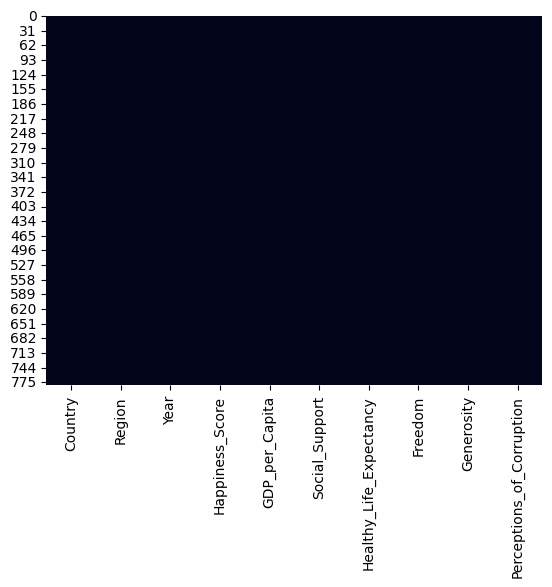

In [17]:
import seaborn as sns
sns.heatmap(df_complete.isna(), cbar=False)

United arab emirates, viene con un faltante en perception of corruption desde el df original, se llena el dato con el promedio de los demás años de ese mismo país

In [18]:
df_complete.loc[
    df_complete["Country"] == "United Arab Emirates",
    ["Year", "Country", "Perceptions_of_Corruption"]
]


,Year,Country,Perceptions_of_Corruption
19,2015,United Arab Emirates,0.38583
185,2016,United Arab Emirates,0.35561
335,2017,United Arab Emirates,0.32449
489,2018,United Arab Emirates,NaN
646,2019,United Arab Emirates,0.18200


In [19]:
mean_uae = df_complete.loc[
    (df_complete["Country"] == "United Arab Emirates") &
    (df_complete["Perceptions_of_Corruption"].notna()),
    "Perceptions_of_Corruption"
].mean()
print("Promedio UAE:", round(mean_uae, 4))


Promedio UAE: 0.312


In [20]:
df_complete.loc[
    (df_complete["Country"] == "United Arab Emirates") &
    (df_complete["Year"] == 2018),
    "Perceptions_of_Corruption"
] = mean_uae


In [21]:
df_complete.loc[
    df_complete["Country"] == "United Arab Emirates",
    ["Year", "Country", "Perceptions_of_Corruption"]
]

,Year,Country,Perceptions_of_Corruption
19,2015,United Arab Emirates,0.385830
185,2016,United Arab Emirates,0.355610
335,2017,United Arab Emirates,0.324490
489,2018,United Arab Emirates,0.311982
646,2019,United Arab Emirates,0.182000


In [22]:
df_complete.to_csv('../data/happiness_2015to2019_cleaned.csv', index=False)

**1. Distribution of Happiness Score by Year**

The overall distribution of happiness scores across 2015–2019 is approximately normal, centered around 5–6 points.
The density curves show only minor shifts between years, suggesting that global happiness levels remained relatively stable over this period.

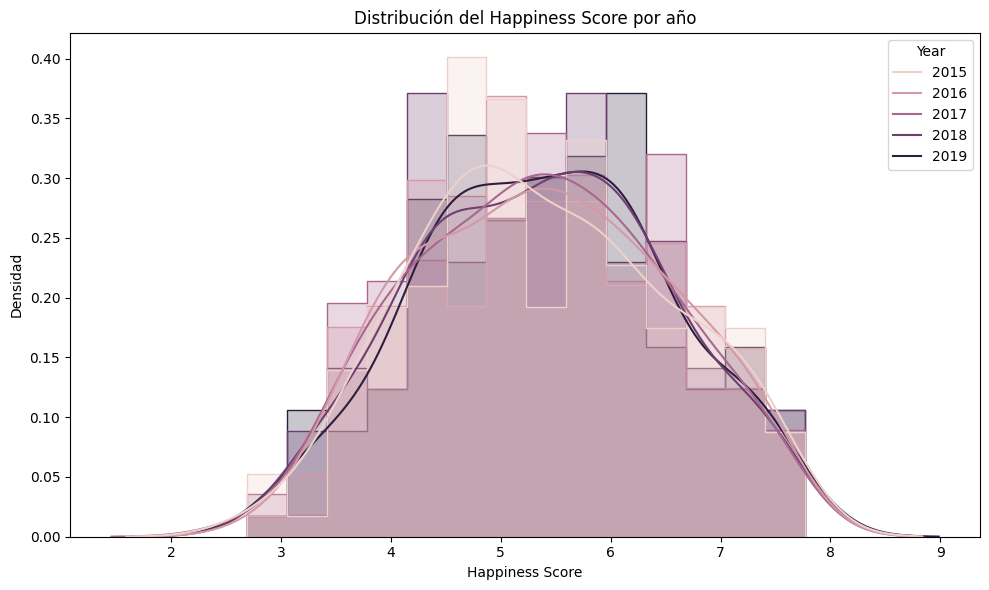

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_complete, x="Happiness_Score", hue="Year", stat="density", element="step", common_norm=False)
sns.kdeplot(data=df_complete, x="Happiness_Score", hue="Year", common_norm=False)
plt.title("Distribución del Happiness Score por año")
plt.xlabel("Happiness Score"); plt.ylabel("Densidad")
plt.tight_layout(); plt.show()


**2. Boxplot of Happiness Score by Year**

The median happiness score remains steady between 5 and 6 across all years.
The interquartile range (IQR) is narrow, meaning most countries cluster around similar happiness levels, and the range of outliers is consistent—indicating no extreme changes in global happiness variability.

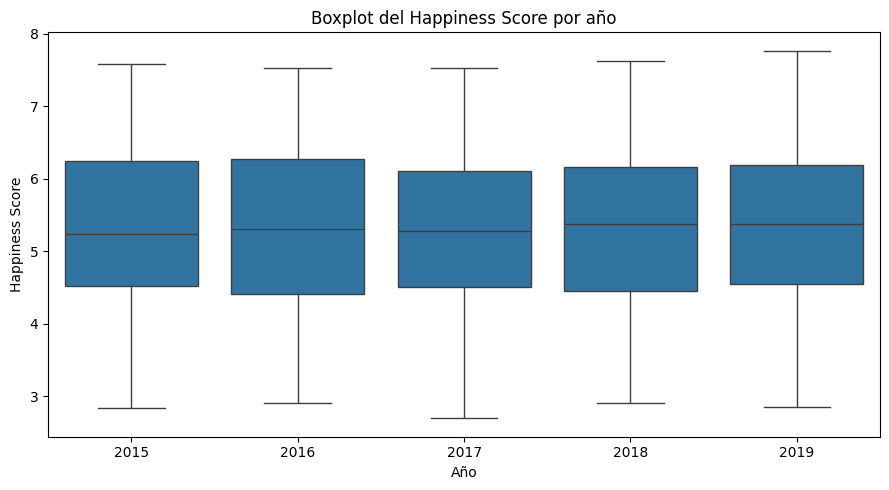

In [24]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df_complete, x="Year", y="Happiness_Score")
plt.title("Boxplot del Happiness Score por año")
plt.xlabel("Año"); plt.ylabel("Happiness Score")
plt.tight_layout(); plt.show()


**3. Violin Plot of Happiness Score by Year**

The violin plots confirm that the distribution shape is consistent from 2015 to 2019, with most density concentrated between scores of 4 and 6.
This reinforces the finding that global happiness distribution has not changed dramatically over time.

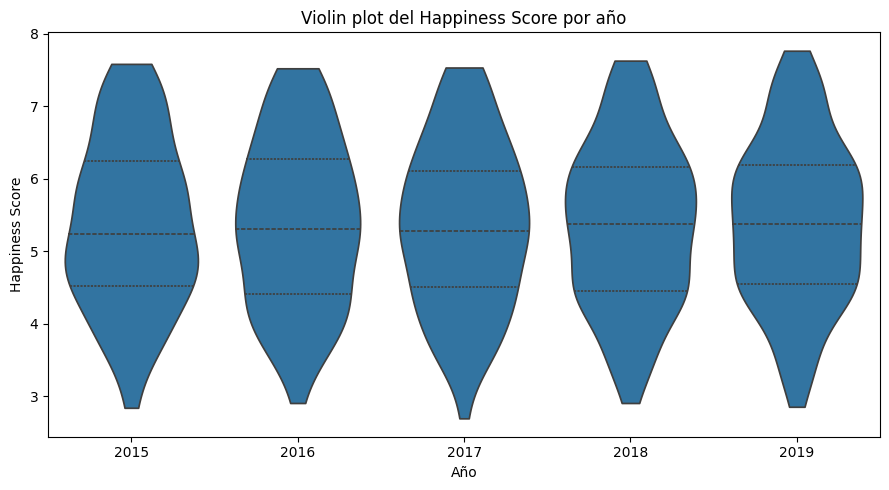

In [25]:
plt.figure(figsize=(9,5))
sns.violinplot(data=df_complete, x="Year", y="Happiness_Score", inner="quartile", cut=0)
plt.title("Violin plot del Happiness Score por año")
plt.xlabel("Año"); plt.ylabel("Happiness Score")
plt.tight_layout(); plt.show()


**4. Top 20 Happiest Countries (Average 2015–2019)**

Northern European countries such as Denmark, Norway, Finland, and Switzerland consistently rank at the top.
These nations typically combine strong social support, high GDP per capita, and high trust in institutions.
Costa Rica stands out as a high performer outside Europe.

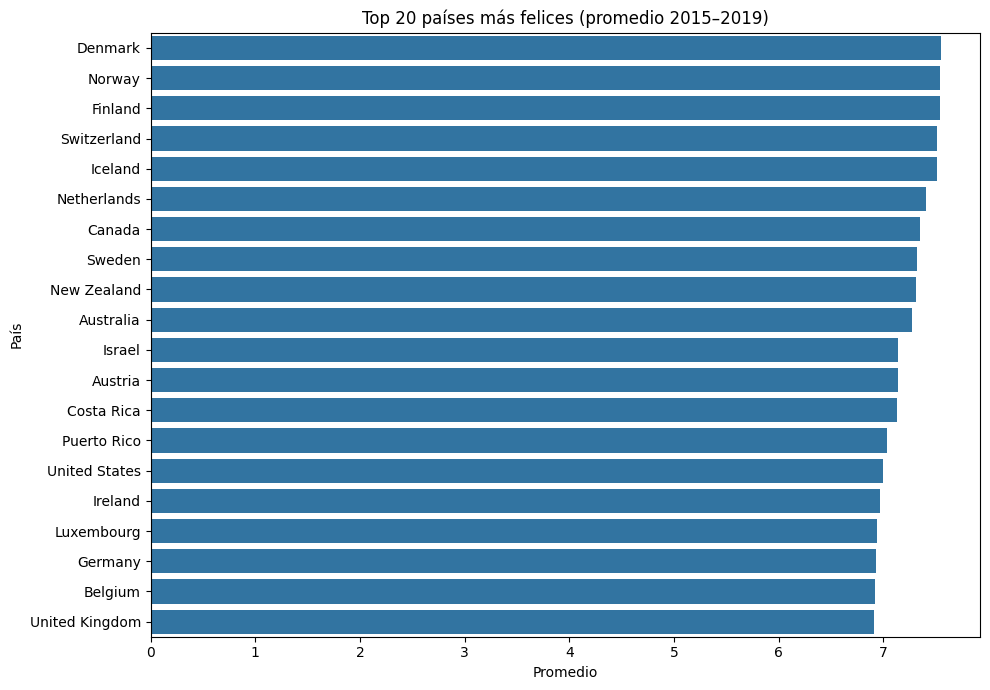

,Country,Happiness_Score
38,Denmark,7.5460
109,Norway,7.5410
47,Finland,7.5378
140,Switzerland,7.5114
61,Iceland,7.5110
102,Netherlands,7.4046
25,Canada,7.3506
139,Sweden,7.3192
103,New Zealand,7.3130
6,Australia,7.2762


In [26]:
by_country = (df_complete.groupby("Country", as_index=False)["Happiness_Score"]
              .mean().sort_values("Happiness_Score", ascending=False).head(20))

plt.figure(figsize=(10,7))
sns.barplot(data=by_country, y="Country", x="Happiness_Score")
plt.title("Top 20 países más felices (promedio 2015–2019)")
plt.xlabel("Promedio"); plt.ylabel("País")
plt.tight_layout(); plt.show()

by_country


**5. Evolution of Happiness Score — Top 10 Countries**

Among the top 10 happiest countries, Finland shows a clear upward trend, becoming the leader by 2019.
Other countries like Norway and Denmark remain consistently high, while Canada and Australia show slight declines.
This highlights the stability of happiness in Nordic nations.

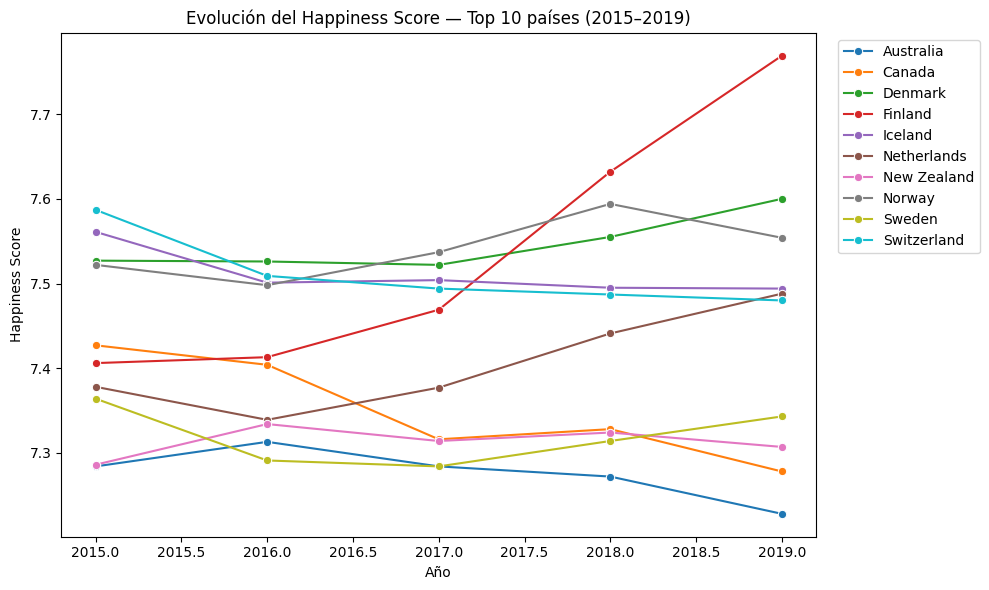

In [27]:
top10 = (df_complete.groupby("Country")["Happiness_Score"]
         .mean().sort_values(ascending=False).head(10).index)

trend_top10 = (df_complete[df_complete["Country"].isin(top10)]
               .groupby(["Year","Country"], as_index=False)["Happiness_Score"].mean())

plt.figure(figsize=(10,6))
sns.lineplot(data=trend_top10, x="Year", y="Happiness_Score", hue="Country", marker="o")
plt.title("Evolución del Happiness Score — Top 10 países (2015–2019)")
plt.xlabel("Año"); plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left"); plt.tight_layout(); plt.show()


**6. Correlation Matrix (2015–2019)**

Happiness Score is strongly correlated with GDP per Capita (0.79), Healthy Life Expectancy (0.74), and Social Support (0.65).
Freedom and perception of corruption also show moderate positive relationships.
Generosity has the weakest correlation, indicating it contributes less to overall happiness prediction.

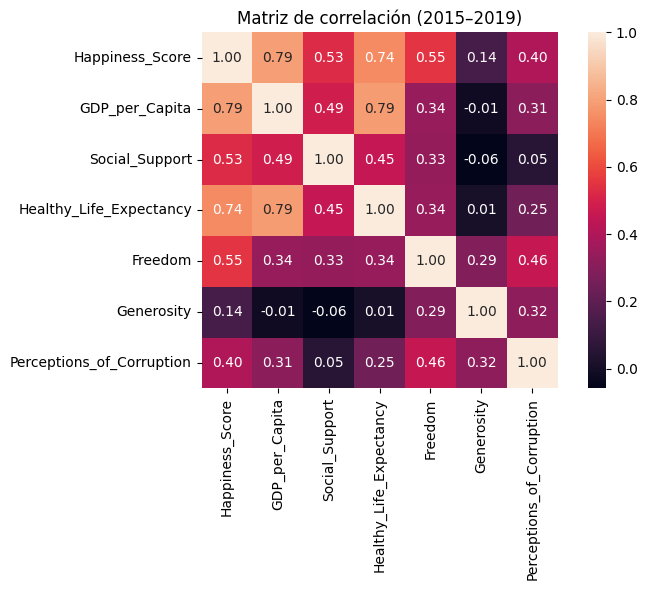

,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Perceptions_of_Corruption
Happiness_Score,1.000000,0.789573,0.527089,0.744373,0.551258,0.138462,0.400025
GDP_per_Capita,0.789573,1.000000,0.485445,0.785747,0.341048,-0.013705,0.310309
Social_Support,0.527089,0.485445,1.000000,0.452433,0.334755,-0.058953,0.053785
Healthy_Life_Expectancy,0.744373,0.785747,0.452433,1.000000,0.341682,0.010931,0.246776
Freedom,0.551258,0.341048,0.334755,0.341682,1.000000,0.291276,0.456604
Generosity,0.138462,-0.013705,-0.058953,0.010931,0.291276,1.000000,0.318228
Perceptions_of_Corruption,0.400025,0.310309,0.053785,0.246776,0.456604,0.318228,1.000000


In [28]:
num_cols = [
    "Happiness_Score","GDP_per_Capita","Social_Support",
    "Healthy_Life_Expectancy","Freedom","Generosity","Perceptions_of_Corruption"
]
num_cols = [c for c in num_cols if c in df_complete.columns]

corr = df_complete[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Matriz de correlación (2015–2019)")
plt.tight_layout(); plt.show()

corr


**7. Global Average Happiness Over Time**

The global average happiness score fluctuates slightly between 5.36 and 5.40, showing overall stability.
Despite local variations, there is no strong upward or downward global trend, suggesting a relatively constant global happiness baseline.

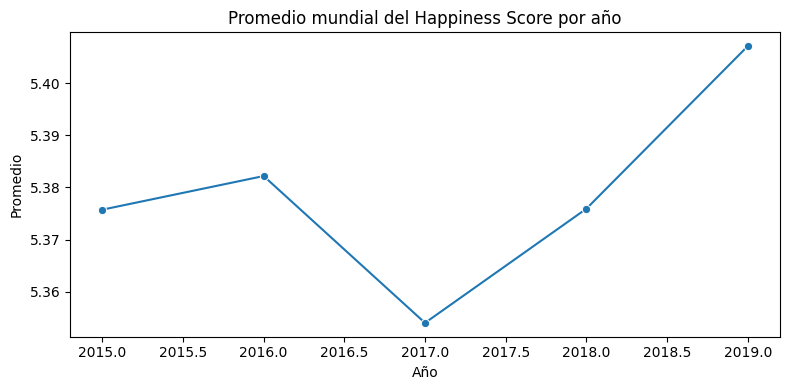

,Year,Happiness_Score
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.375917
4,2019,5.407096


In [29]:
mean_year = df_complete.groupby("Year", as_index=False)["Happiness_Score"].mean()

plt.figure(figsize=(8,4))
sns.lineplot(data=mean_year, x="Year", y="Happiness_Score", marker="o")
plt.title("Promedio mundial del Happiness Score por año")
plt.xlabel("Año"); plt.ylabel("Promedio")
plt.tight_layout(); plt.show()

mean_year


**8. Outliers in Happiness Rank by Year**

The boxplot of Happiness Rank shows a symmetric distribution from 1 to about 155 each year, with no strong outliers.
This means the ranking spread among countries remains balanced and similar year to year.

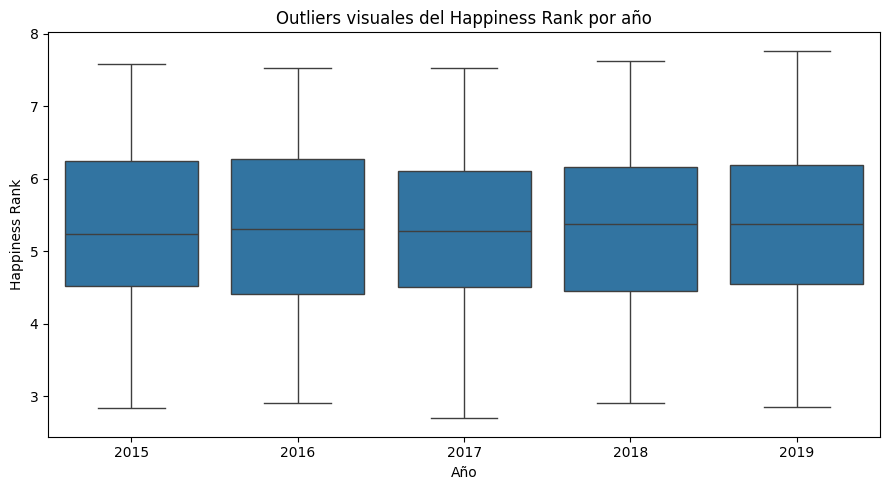

In [30]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df_complete, x="Year", y="Happiness_Score")
plt.title("Outliers visuales del Happiness Rank por año")
plt.xlabel("Año"); plt.ylabel("Happiness Rank")
plt.tight_layout(); plt.show()


**9. Bottom 10 Least Happy Countries (Average 2015–2019)**

The least happy countries consistently include nations such as Burundi, South Sudan, Central African Republic, and Afghanistan.
These countries tend to face significant economic, political, and social challenges — such as poverty, corruption, low life expectancy, and weak social support networks.
The sharp contrast between the top and bottom 10 countries highlights persistent global inequality in well-being and living conditions.

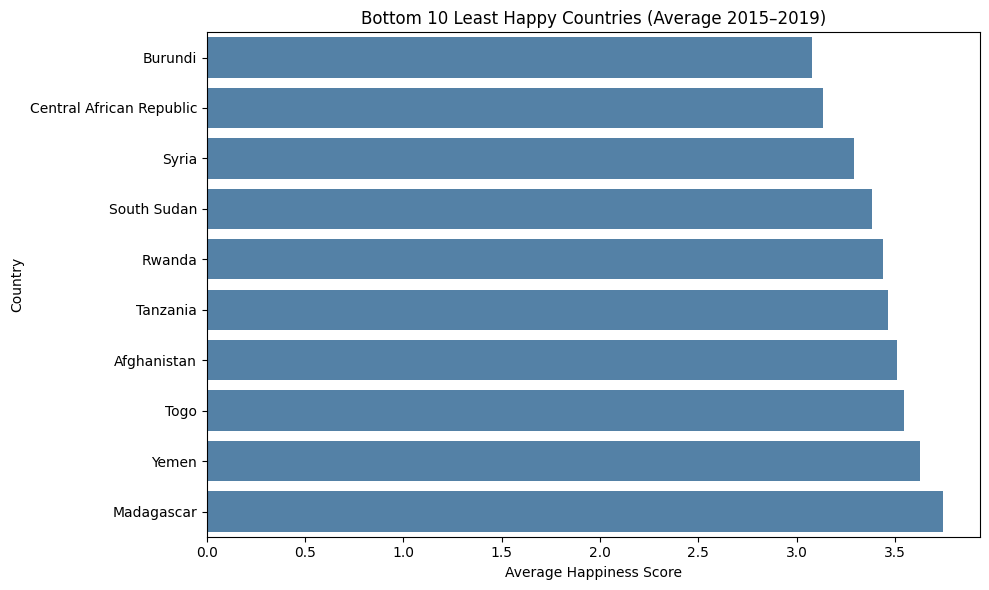

,Country,Happiness_Score
22,Burundi,3.07900
26,Central African Republic,3.13425
141,Syria,3.29220
134,South Sudan,3.38250
123,Rwanda,3.43860
144,Tanzania,3.46600
0,Afghanistan,3.51280
146,Togo,3.54420
160,Yemen,3.62580
86,Madagascar,3.74540


In [31]:
# Bottom 10 least happy countries (average 2015–2019)
bottom10 = (df_complete.groupby("Country", as_index=False)["Happiness_Score"]
            .mean().sort_values("Happiness_Score", ascending=True).head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=bottom10, y="Country", x="Happiness_Score", color="steelblue")
plt.title("Bottom 10 Least Happy Countries (Average 2015–2019)")
plt.xlabel("Average Happiness Score"); plt.ylabel("Country")
plt.tight_layout(); plt.show()

bottom10


**Overall Summary — Happiness EDA (2015–2019)**

The exploratory analysis of global happiness data from 2015 to 2019 shows that average happiness levels remained fairly stable over time, centered around a score of 5–6.
Nordic countries such as Finland, Denmark, and Norway consistently rank highest, supported by strong economies, social trust, and healthy lifestyles.
Conversely, the least happy countries are primarily those affected by conflict or poor governance, where citizens face lower income and weaker health and social systems.
Correlation analysis reveals that GDP per capita, life expectancy, and social support are the most influential drivers of happiness, while generosity and perceptions of corruption play smaller roles.
Overall, happiness across the world demonstrates stability but also enduring inequality — the gap between the most and least happy nations remains wide, reflecting the uneven distribution of social and economic prosperity.